# FIN 359 Final Project

## Question 1 - Ploting and Charting

In [34]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Fetching data from FRED
start_date = "2010-01-01"
end_date = "2023-01-01"

In [38]:
# Inflation rate (CPI YoY change)
inflation = pdr.get_data_fred("CPIAUCSL", start_date, end_date)  # CPI data
inflation['Inflation Rate (%)'] = inflation['CPIAUCSL'].pct_change(12) * 100

In [40]:
# Unemployment rate
unemployment = pdr.get_data_fred("UNRATE", start_date, end_date)  # Unemployment rate data

In [42]:
# Merging datasets
data = pd.concat([inflation['Inflation Rate (%)'], unemployment['UNRATE']], axis=1)
data.columns = ['Inflation Rate (%)', 'Unemployment Rate (%)']
data.dropna(inplace=True)

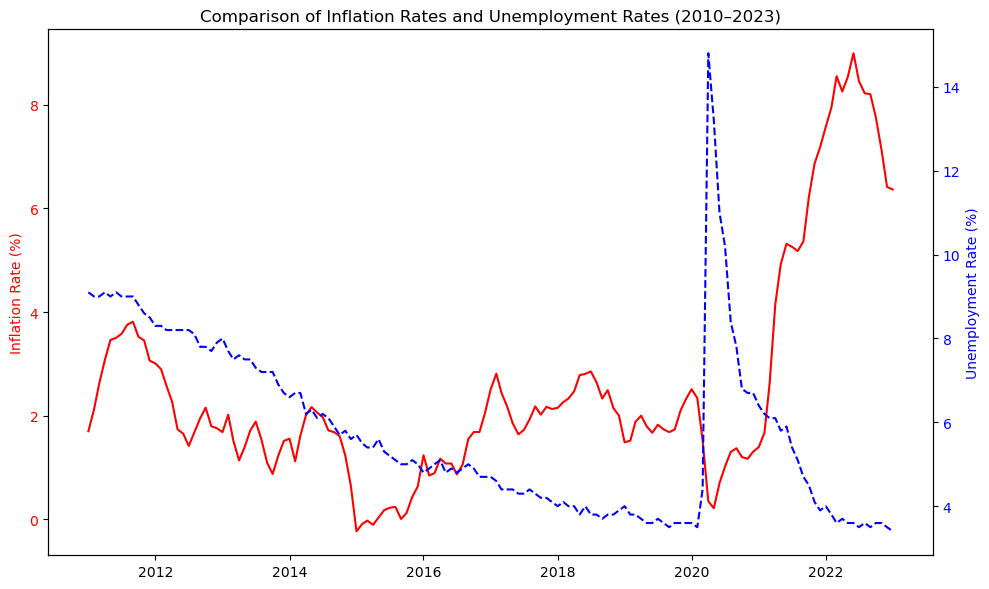

In [44]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Inflation rate on left y-axis
ax1.plot(data.index, data['Inflation Rate (%)'], color='red', label='Inflation Rate (%)')
ax1.set_ylabel('Inflation Rate (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Unemployment rate on right y-axis
ax2 = ax1.twinx()
ax2.plot(data.index, data['Unemployment Rate (%)'], color='blue', linestyle='--', label='Unemployment Rate (%)')
ax2.set_ylabel('Unemployment Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding title and legend
plt.title('Comparison of Inflation Rates and Unemployment Rates (2010–2023)')
fig.tight_layout()
plt.show()

## Question 2 - Data Analysis: Industrial Automation Distribution

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm

Columns in the dataset: Index(['Year', 'industry', 'installations', 'industry_encoded',
       'Three_Component_Index', 'News_Based_Policy_Uncert_Index',
       'FedStateLocal_Ex_disagreement', 'CPI_disagreement', 'Tax_expiration',
       'GEPU_current',
       ...
       'oas_aaa', 'oas_euro', 'yield3m', 'yield6m', 'yield1y', 'l_oas_aaa',
       'l_oas_euro', 'l_yield3m', 'l_yield6m', 'l_yield1y'],
      dtype='object', length=105)
   Year        industry  installations industry_encoded  \
0  1993  All Industries         5246.0   All Industries   
1  1994  All Industries         6676.0   All Industries   
2  1995  All Industries         8815.0   All Industries   
3  1996  All Industries         8385.0   All Industries   
4  1997  All Industries        10723.0   All Industries   

   Three_Component_Index  News_Based_Policy_Uncert_Index  \
0             107.450182                      102.294445   
1              89.985716                       87.571007   
2              81.106291    

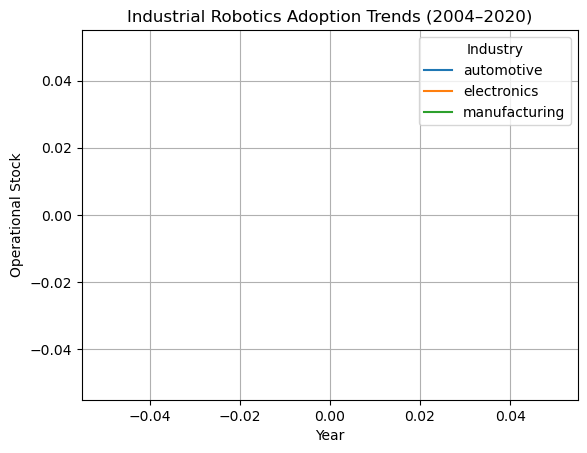

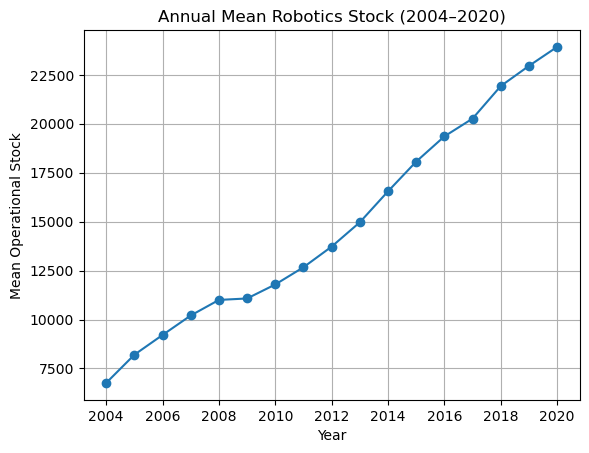


Merged Data Summary:
       Robotics Mean Stock        VIX
count            17.000000  17.000000
mean          14861.644042  18.860442
std            5409.587051   6.722552
min            6763.025641  11.090239
25%           11002.000000  14.230119
50%           13724.717949  16.639841
75%           19353.769231  22.548889
max           23923.307692  32.694862

Regression Results:
                            OLS Regression Results                            
Dep. Variable:           Log Robotics   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                  0.009319
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.924
Time:                        22:00:19   Log-Likelihood:                -7.1663
No. Observations:                  17   AIC:                             18.33
Df Residuals:                      15   BIC:                  

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [65]:
# File path for the dataset
file_path = "/Users/samirachaunkaria/Desktop/FIN 359 Coursework/dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Inspect the dataset
print("Columns in the dataset:", data.columns)
print(data.head())

# Ensure the column names are lowercase for consistency
data.columns = data.columns.str.lower()

# Filter dataset: Exclude 'all industries' and restrict to years 2004–2020
if 'year' in data.columns:
    data = data[(data['industry'] != 'all industries') & (data['year'].between(2004, 2020))]
else:
    print("Error: 'year' column not found in the dataset.")
    exit()

print("\nFiltered Data:")
print(data.head())

# Select at least three industries
selected_industries = ['automotive', 'electronics', 'manufacturing']  # Replace with actual industry names from dataset
industry_data = data[data['industry'].isin(selected_industries)]

# Plotting trends for selected industries
for industry in selected_industries:
    subset = industry_data[industry_data['industry'] == industry]
    plt.plot(subset['year'], subset['operational_stock'], label=industry)

plt.title('Industrial Robotics Adoption Trends (2004–2020)')
plt.xlabel('Year')
plt.ylabel('Operational Stock')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

# Calculate annual mean operational stock
annual_mean = data.groupby('year')['operational_stock'].mean()

# Plot the annual mean
plt.plot(annual_mean.index, annual_mean.values, marker='o')
plt.title('Annual Mean Robotics Stock (2004–2020)')
plt.xlabel('Year')
plt.ylabel('Mean Operational Stock')
plt.grid(True)
plt.show()

# Fetch CBOE Volatility Index (VIX) data
vix = web.DataReader('VIXCLS', 'fred', start='2004-01-01', end='2020-12-31')
vix['year'] = vix.index.year
annual_vix = vix.groupby('year')['VIXCLS'].mean()

# Merge robotics and volatility data
merged_data = pd.DataFrame({'Robotics Mean Stock': annual_mean, 'VIX': annual_vix})
print("\nMerged Data Summary:")
print(merged_data.describe())

# Log-transform variables for regression
merged_data['Log Robotics'] = np.log(merged_data['Robotics Mean Stock'])
merged_data['Log VIX'] = np.log(merged_data['VIX'])

# Perform OLS regression
X = sm.add_constant(merged_data['Log VIX'])  # Add constant for intercept
y = merged_data['Log Robotics']
model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(model.summary())


## Question 3 - Capital Budgeting

In [94]:
import numpy as np
cash_flows = [5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023]
T = len(cash_flows)  # Define the number of periods

In [96]:
# Inputs
cash_flows = [5300, 5400, 5895, 6000, 7008, 7532, 8000, 8032, 8521, 8600, 9023]
discount_rates = [0.101, 0.092, 0.112, 0.113, 0.130, 0.145, 0.145, 0.149, 0.113, 0.151, 0.156]
initial_cost = 15038 + 5355

In [98]:
# Calculate NPV
npv = sum(cf / ((1 + r) ** t) for t, (cf, r) in enumerate(zip(cash_flows, discount_rates), start=1)) - initial_cost
print(f"Net Present Value (NPV): ${npv:.2f}")

Net Present Value (NPV): $17227.26


In [100]:
from numpy_financial import irr

# Include initial cost as a negative cash flow
full_cash_flows = [-initial_cost] + cash_flows
irr_value = irr(full_cash_flows)
print(f"Internal Rate of Return (IRR): {irr_value * 100:.2f}%")

Internal Rate of Return (IRR): 28.92%


In [102]:
new_discount_rates = [r - 0.0056 for r in discount_rates]

# Calculate new NPV with updated discount rates
new_npv = sum(cf / ((1 + r) ** t) for t, (cf, r) in enumerate(zip(cash_flows, new_discount_rates), start=1)) - initial_cost
print(f"New NPV: ${new_npv:.2f}")

New NPV: $18209.72


In [104]:
# Calculate percentage change in NPV
percentage_change = ((new_npv - npv) / npv) * 100
print(f"Percentage change in NPV: {percentage_change:.2f}%")

Percentage change in NPV: 5.70%


In [106]:
# Parameters for growth
growth_mean = 0.0035
growth_std = 0.04
np.random.seed(42)  # For reproducibility

# Generate growth rates
growth_rates = np.random.normal(growth_mean, growth_std, T)

# Calculate projected cash flows
projected_cash_flows = [cash_flows[0]]  # Start with CF at t1
for t in range(1, T):
    projected_cash_flows.append(projected_cash_flows[t-1] * (1 + growth_rates[t-1]))

print("Projected Cash Flows with Growth:", projected_cash_flows)

Projected Cash Flows with Growth: [5300, 5423.853400438381, 5412.839875337252, 5572.018188734146, 5930.9742548703425, 5896.182359275384, 5861.598429724121, 6252.382478611289, 6466.197635447766, 6367.400760602398, 6527.8745526325765]


## Question 4 - Numpy Array Computation in Business Operation

In [114]:
import numpy as np

# Data for each store (monthly customer visits)
store1 = np.array([1169, 1245, 1400, 1305, 2002, 3020, 4540, 3987, 4900, 5010, 6939, 8989])
store2 = np.array([780, 804, 930, 1305, 1504, 2829, 3542, 4001, 3764, 4703, 6523, 8010])
store3 = np.array([1552, 1621, 1830, 1902, 2098, 3923, 5563, 5017, 6102, 6880, 7069, 9140])

In [116]:
# Total annual customer visits for each store
total_store1 = np.sum(store1)
total_store2 = np.sum(store2)
total_store3 = np.sum(store3)

# Percentage of monthly visits for each store
percentage_store1 = (store1 / total_store1) * 100
percentage_store2 = (store2 / total_store2) * 100
percentage_store3 = (store3 / total_store3) * 100

print("Percentage of monthly visits for Store 1:", percentage_store1)
print("Percentage of monthly visits for Store 2:", percentage_store2)
print("Percentage of monthly visits for Store 3:", percentage_store3)

Percentage of monthly visits for Store 1: [ 2.62661214  2.79737563  3.14564328  2.93218892  4.4982699   6.78560194
 10.20087179  8.9583427  11.00975149 11.25690918 15.59115625 20.19727677]
Percentage of monthly visits for Store 2: [ 2.01576431  2.07778783  2.40341129  3.37252875  3.88680708  7.3110221
  9.15363742 10.33983719  9.72735496 12.15402507 16.85747513 20.70034888]
Percentage of monthly visits for Store 3: [ 2.94513919  3.07607644  3.47268345  3.60931362  3.9812513   7.44444655
 10.55657817  9.52046606 11.5794068  13.05577168 13.41442587 17.34444086]


In [118]:
# Total customer visits across all stores
total_business = total_store1 + total_store2 + total_store3

# Contribution of each store to the total business visits
contribution_store1 = (total_store1 / total_business) * 100
contribution_store2 = (total_store2 / total_business) * 100
contribution_store3 = (total_store3 / total_business) * 100

print("Store 1 contribution to total business visits:", contribution_store1)
print("Store 2 contribution to total business visits:", contribution_store2)
print("Store 3 contribution to total business visits:", contribution_store3)

Store 1 contribution to total business visits: 32.749562171628725
Store 2 contribution to total business visits: 28.4735610531428
Store 3 contribution to total business visits: 38.77687677522848
